<a href="https://colab.research.google.com/github/JincyVinod/End-to-end-machine-learning-Project/blob/main/LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 1**

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (4 dimensions: sepal length, sepal width, petal length, petal width)

#Using Scikit-learn
pca = PCA(n_components=2)  # Request the first 2 principal components
X_pca_sklearn = pca.fit_transform(X)

# Extract the first two principal components
c1_sklearn = pca.components_[0]  # First principal component
c2_sklearn = pca.components_[1]  # Second principal component

# Print the results
print("Using Scikit-learn:")
print("First Principal Component (c1):", c1_sklearn)
print("Second Principal Component (c2):", c2_sklearn)

# Without Scikit-learn (Using SVD)

# Center the data (subtract the mean of each feature)
X_centered = X - X.mean(axis=0)

# Perform Singular Value Decomposition (SVD)
U, s, Vt = np.linalg.svd(X_centered)

# Extract the first two principal components
c1_manual = Vt.T[:, 0]  # First principal component
c2_manual = Vt.T[:, 1]  # Second principal component

# Print the results
print("\nWithout Scikit-learn (Using SVD):")
print("First Principal Component (c1):", c1_manual)
print("Second Principal Component (c2):", c2_manual)

Using Scikit-learn:
First Principal Component (c1): [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
Second Principal Component (c2): [ 0.65658877  0.73016143 -0.17337266 -0.07548102]

Without Scikit-learn (Using SVD):
First Principal Component (c1): [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
Second Principal Component (c2): [-0.65658877 -0.73016143  0.17337266  0.07548102]


In [2]:
# Set the desired percentage of variance to preserve
desired_variance = 0.95

# Find the number of components that preserve at least the desired variance
pca = PCA(n_components=None)  # Do not limit the number of components
pca.fit(X)

# Cumulative sum of explained variance ratios
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components required to preserve at least 'desired_variance'
n_components_to_preserve = np.argmax(cumulative_variance >= desired_variance) + 1

# Perform PCA with the optimal number of components
pca = PCA(n_components=n_components_to_preserve)
X_pca_preserved = pca.fit_transform(X)

# Print the results
print(f"Number of components to preserve {desired_variance*100}% variance: {n_components_to_preserve}")
print("Explained Variance Ratios:", pca.explained_variance_ratio_)
print("Cumulative Variance Explained:", cumulative_variance[:n_components_to_preserve])

# Projected data in the new space
print("\nProjected data (first 5 samples):")
print(X_pca_preserved[:5])

Number of components to preserve 95.0% variance: 2
Explained Variance Ratios: [0.92461872 0.05306648]
Cumulative Variance Explained: [0.92461872 0.97768521]

Projected data (first 5 samples):
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# 1. Prepare the dataset
X = iris.data  # Original dataset (4 features)
y = iris.target  # Target labels

# Encode target labels to one-hot encoding for classification
y_encoded = to_categorical(y)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# ------------------------------
# a) Train a neural network on the original dataset
# ------------------------------

# Define a simple neural network model
model_original = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes in the Iris dataset
])

# Compile the model
model_original.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_original.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss_original, accuracy_original = model_original.evaluate(X_test, y_test)
print(f"\nOriginal Dataset - Test Accuracy: {accuracy_original * 100:.2f}%")

# ------------------------------
# b) Train a neural network on the principal components
# ------------------------------

# Perform PCA to get the principal components (we use 2 components for this example)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # Apply PCA transformation to the data

# Split the dataset into training and testing sets (80% train, 20% test)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)

# Define a neural network model for the PCA-transformed data
model_pca = Sequential([
    Dense(64, input_dim=X_train_pca.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes in the Iris dataset
])

# Compile the model
model_pca.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_pca.fit(X_train_pca, y_train_pca, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss_pca, accuracy_pca = model_pca.evaluate(X_test_pca, y_test_pca)
print(f"\nPrincipal Components Dataset - Test Accuracy: {accuracy_pca * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.3944 - loss: 1.0971 - val_accuracy: 0.7083 - val_loss: 0.8703
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6529 - loss: 0.8623 - val_accuracy: 0.9167 - val_loss: 0.7551
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8355 - loss: 0.7116 - val_accuracy: 0.5000 - val_loss: 0.6988
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8659 - loss: 0.5865 - val_accuracy: 0.9583 - val_loss: 0.5824
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8626 - loss: 0.5447 - val_accuracy: 1.0000 - val_loss: 0.5428
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8952 - loss: 0.4828 - val_accuracy: 1.0000 - val_loss: 0.5102
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9652 - loss: 0.4596 - val_accuracy: 1.0000 - val_loss: 0.4641
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9173 - loss: 0.4080 - val_accuracy: 0.8333 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2586 - loss: 1.2675 - val_accuracy: 0.2500 - val_loss: 1.0671
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4107 - loss: 1.0388 - val_accuracy: 0.7917 - val_loss: 0.9199
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7477 - loss: 0.8776 - val_accuracy: 0.8333 - val_loss: 0.8162
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8238 - loss: 0.7277 - val_accuracy: 0.8333 - val_loss: 0.7182
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7431 - loss: 0.6672 - val_accuracy: 0.8333 - val_loss: 0.6314
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8483 - loss: 0.5233 - val_accuracy: 0.8333 - val_loss: 0.5622
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8264 - loss: 0.4817 - val_accuracy: 0.8333 - val_loss: 0.5071
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8610 - loss: 0.4324 - val_accuracy: 0.8333 - val_loss: 0.4652
Ep

In [4]:
print(f"Original Data - Test Loss: {loss_original}, Test Accuracy: {accuracy_original}")
print(f"PCA Data - Test Loss: {loss_pca}, Test Accuracy: {accuracy_pca}")

Original Data - Test Loss: 0.13053995370864868, Test Accuracy: 0.9333333373069763
PCA Data - Test Loss: 0.08182664215564728, Test Accuracy: 1.0


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4821 - loss: 1.0260 - val_accuracy: 0.8750 - val_loss: 0.8715
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8268 - loss: 0.8298 - val_accuracy: 0.8750 - val_loss: 0.7371
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8324 - loss: 0.6866 - val_accuracy: 0.8750 - val_loss: 0.6425
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7701 - loss: 0.6306 - val_accuracy: 0.8750 - val_loss: 0.5671
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8119 - loss: 0.5332 - val_accuracy: 0.8750 - val_loss: 0.5149
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7802 - loss: 0.5035 - val_accuracy: 0.8750 - val_loss: 0.4743
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7826 - loss: 0.4451 - val_accuracy: 0.8750 - val_loss: 0.4392
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8182 - loss: 0.4236 - val_accuracy: 0.8750 - val_loss: 0.4265
Ep

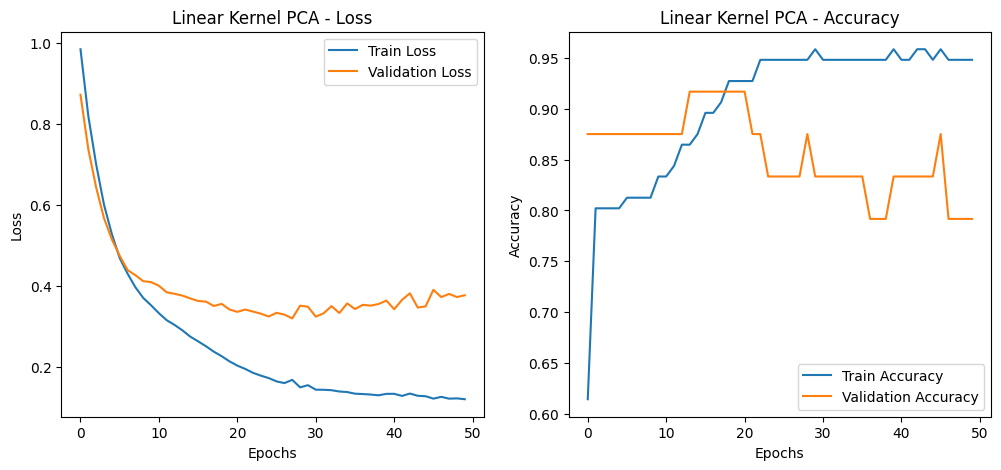

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3614 - loss: 1.0975 - val_accuracy: 0.7917 - val_loss: 1.0322
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8141 - loss: 1.0238 - val_accuracy: 0.7917 - val_loss: 0.9672
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8715 - loss: 0.9507 - val_accuracy: 0.7917 - val_loss: 0.8928
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8772 - loss: 0.8860 - val_accuracy: 0.8333 - val_loss: 0.8175
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8212 - loss: 0.8004 - val_accuracy: 0.7917 - val_loss: 0.7241
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8489 - loss: 0.7225 - val_accuracy: 0.8333 - val_loss: 0.6463
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8426 - loss: 0.6293 - val_accuracy: 0.8333 - val_loss: 0.5784
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8803 - loss: 0.5327 - val_accuracy: 0.8333 - val_loss

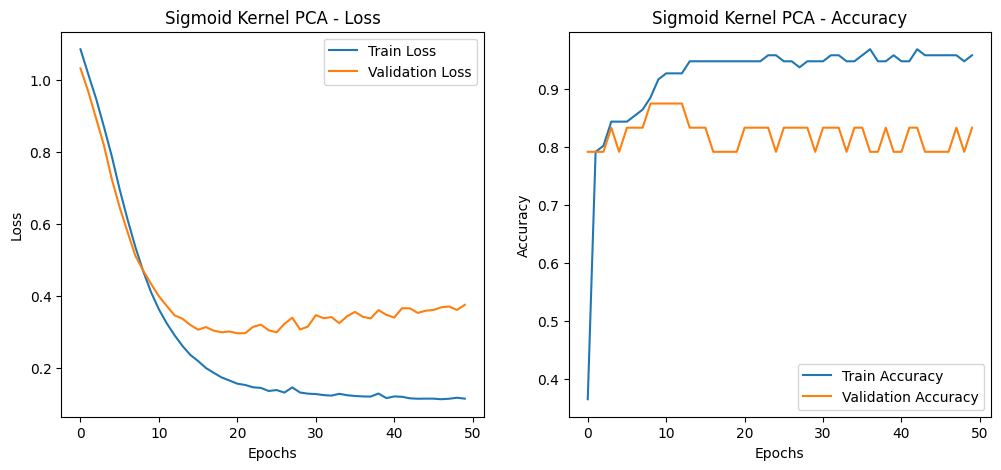

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5354 - loss: 1.0607 - val_accuracy: 0.7917 - val_loss: 1.0131
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8743 - loss: 0.9705 - val_accuracy: 0.8750 - val_loss: 0.9410
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8127 - loss: 0.8704 - val_accuracy: 0.8750 - val_loss: 0.8609
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8391 - loss: 0.7958 - val_accuracy: 0.8333 - val_loss: 0.7755
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8007 - loss: 0.6750 - val_accuracy: 0.8750 - val_loss: 0.6894
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8093 - loss: 0.5898 - val_accuracy: 0.8750 - val_loss: 0.6180
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7985 - loss: 0.5440 - val_accuracy: 0.8333 - val_loss: 0.5618
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8128 - loss: 0.4606 - val_accuracy: 0.8333 - val_loss

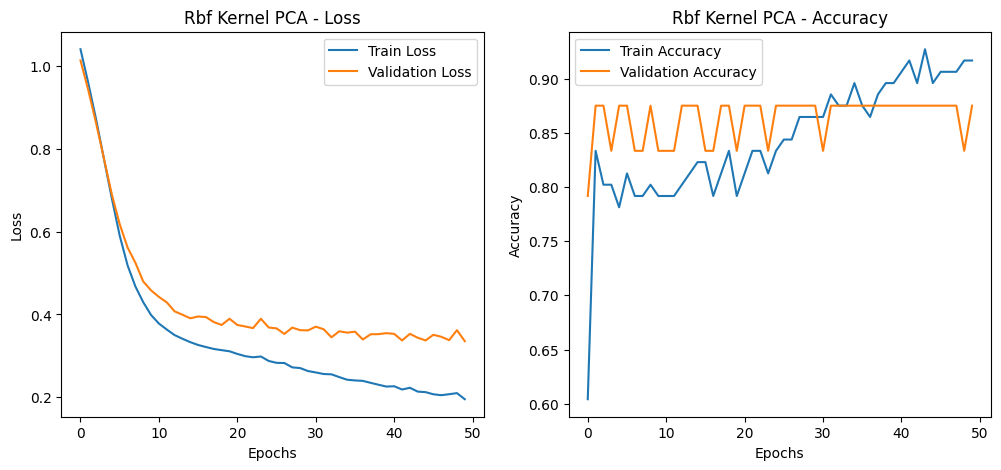

In [5]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. Prepare the dataset
X = iris.data  # Original dataset (4 features)
y = iris.target  # Target labels

# Encode target labels to one-hot encoding for classification
y_encoded = to_categorical(y)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features before applying Kernel PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------
# a) Train a neural network on the original dataset (already done in task 4)
# ------------------------------

# (Task 4 already covered this, so we continue with Kernel PCA)

# ------------------------------
# b) Train a neural network on the Kernel PCA transformed data (for Linear, Sigmoid, and RBF kernels)
# ------------------------------

# Define a function to build and compile the neural network model
def build_model(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu'),
        Dense(32, activation='relu'),
        Dense(3, activation='softmax')  # 3 classes in the Iris dataset
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# List of KernelPCA with different kernels
kernels = ['linear', 'sigmoid', 'rbf']
X_train_kpca_list = []
X_test_kpca_list = []

# Apply KernelPCA with different kernels (Linear, Sigmoid, RBF)
for kernel in kernels:
    kpca = KernelPCA(n_components=2, kernel=kernel, gamma=0.1 if kernel == 'rbf' else None)
    X_train_kpca = kpca.fit_transform(X_train_scaled)
    X_test_kpca = kpca.transform(X_test_scaled)
    X_train_kpca_list.append(X_train_kpca)
    X_test_kpca_list.append(X_test_kpca)

# Train and evaluate models for each KernelPCA output
for i, kernel in enumerate(kernels):
    # Build the neural network model
    model = build_model(X_train_kpca_list[i].shape[1])

    # Train the model on Kernel PCA transformed data
    history = model.fit(
        X_train_kpca_list[i], y_train,
        epochs=50, batch_size=8, validation_split=0.2, verbose=1
    )

    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test_kpca_list[i], y_test)
    print(f"\n{kernel.capitalize()} Kernel PCA - Test Accuracy: {accuracy * 100:.2f}%, Test Loss: {loss:.4f}")

    # Plot training loss and accuracy for each kernel
    plt.figure(figsize=(12, 5))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{kernel.capitalize()} Kernel PCA - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{kernel.capitalize()} Kernel PCA - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.neural_network import MLPClassifier

# Define a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('kpca', KernelPCA()),         # Kernel PCA for dimensionality reduction
    ('clf', MLPClassifier(max_iter=300, random_state=42))  # Neural network classifier
])

# Define hyperparameters to tune
param_grid = {
    'kpca__n_components': [2, 3],  # Number of principal components
    'kpca__kernel': ['linear', 'rbf', 'sigmoid'],  # Kernel types
    'kpca__gamma': [0.1, 0.5, 1],  # Gamma parameter (for RBF and sigmoid)
    'clf__hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Neural network structure
    'clf__activation': ['relu', 'tanh'],  # Activation functions
    'clf__learning_rate_init': [0.001, 0.01, 0.1]  # Learning rate
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate on the test set
test_score = grid_search.score(X_test, y_test)
print("Test accuracy with best parameters:", test_score)


Fitting 3 folds for each of 324 candidates, totalling 972 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters: {'clf__activation': 'relu', 'clf__hidden_layer_sizes': (50,), 'clf__learning_rate_init': 0.01, 'kpca__gamma': 0.1, 'kpca__kernel': 'sigmoid', 'kpca__n_components': 3}
Best cross-validation accuracy: 0.9583333333333334
Test accuracy with best parameters: 0.9666666666666667


**TASK 2**

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Load IRIS dataset
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

# One-hot encode the labels for IRIS
y_iris = tf.keras.utils.to_categorical(y_iris, 3)

# Split IRIS data
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Load MNIST Fashion dataset
(X_train_fashion, y_train_fashion), (X_test_fashion, y_test_fashion) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train_fashion = X_train_fashion / 255.0
X_test_fashion = X_test_fashion / 255.0

# Reshape to fit the input format for a neural network (flatten 28x28 images to 784)
X_train_fashion = X_train_fashion.reshape(-1, 28*28)
X_test_fashion = X_test_fashion.reshape(-1, 28*28)

# One-hot encode the labels for MNIST Fashion
y_train_fashion = tf.keras.utils.to_categorical(y_train_fashion, 10)
y_test_fashion = tf.keras.utils.to_categorical(y_test_fashion, 10)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# Build model for IRIS dataset
model_iris = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_iris.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes for IRIS
])

model_iris.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_iris = model_iris.fit(X_train_iris, y_train_iris, epochs=50, batch_size=16, validation_data=(X_test_iris, y_test_iris))

# Evaluate on IRIS
loss_iris, accuracy_iris = model_iris.evaluate(X_test_iris, y_test_iris)
print(f"IRIS Dataset Accuracy: {accuracy_iris * 100:.2f}%")

# Build model for MNIST Fashion dataset
model_fashion = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_fashion.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
])

model_fashion.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_fashion = model_fashion.fit(X_train_fashion, y_train_fashion, epochs=50, batch_size=64, validation_data=(X_test_fashion, y_test_fashion))

# Evaluate on Fashion MNIST
loss_fashion, accuracy_fashion = model_fashion.evaluate(X_test_fashion, y_test_fashion)
print(f"Fashion MNIST Accuracy: {accuracy_fashion * 100:.2f}%")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3215 - loss: 1.2051 - val_accuracy: 0.3000 - val_loss: 1.0605
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2755 - loss: 1.0683 - val_accuracy: 0.6000 - val_loss: 1.0199
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6370 - loss: 0.9897 - val_accuracy: 0.6333 - val_loss: 0.9341
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5967 - loss: 0.9304 - val_accuracy: 0.7000 - val_loss: 0.8728
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6367 - loss: 0.8736 - val_accuracy: 0.7000 - val_loss: 0.8160
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6424 - loss: 0.8086 - val_accuracy: 0.7000 - val_loss: 0.7557
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6611 - loss: 0.7560 - val_accuracy: 0.8000 - val_loss: 0.7055
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7845 - loss: 0.6745 - val_accuracy: 0.7333 - val_loss: 0.6483
Epoch 9/50
8/8 ━━━

In [9]:
# Hyperparameter tuning for IRIS dataset
model_iris_tuned = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_iris.shape[1],)),  # Tuning hidden layer size and activation
    layers.Dense(64, activation='relu'),  # Adding more neurons and layers
    layers.Dense(3, activation='softmax')  # 3 classes for IRIS
])

model_iris_tuned.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_iris_tuned = model_iris_tuned.fit(X_train_iris, y_train_iris, epochs=50, batch_size=16, validation_data=(X_test_iris, y_test_iris))

# Evaluate the tuned IRIS model
loss_iris_tuned, accuracy_iris_tuned = model_iris_tuned.evaluate(X_test_iris, y_test_iris)
print(f"Tuned IRIS Dataset Accuracy: {accuracy_iris_tuned * 100:.2f}%")

# Hyperparameter tuning for Fashion MNIST dataset
model_fashion_tuned = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_fashion.shape[1],)),  # Larger hidden layers for complexity
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),  # Additional hidden layer for more capacity
    layers.Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
])

model_fashion_tuned.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_fashion_tuned = model_fashion_tuned.fit(X_train_fashion, y_train_fashion, epochs=50, batch_size=64, validation_data=(X_test_fashion, y_test_fashion))

# Evaluate the tuned Fashion MNIST model
loss_fashion_tuned, accuracy_fashion_tuned = model_fashion_tuned.evaluate(X_test_fashion, y_test_fashion)
print(f"Tuned Fashion MNIST Accuracy: {accuracy_fashion_tuned * 100:.2f}%")


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5719 - loss: 1.1758 - val_accuracy: 0.4333 - val_loss: 0.8913
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6009 - loss: 0.8580 - val_accuracy: 0.9000 - val_loss: 0.7233
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8889 - loss: 0.7019 - val_accuracy: 0.9667 - val_loss: 0.6128
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8490 - loss: 0.5807 - val_accuracy: 0.7333 - val_loss: 0.5262
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8195 - loss: 0.4836 - val_accuracy: 0.9000 - val_loss: 0.4794
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8157 - loss: 0.4765 - val_accuracy: 0.9667 - val_loss: 0.4257
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8328 - loss: 0.4501 - val_accuracy: 0.8000 - val_loss: 0.3949
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8409 - loss: 0.3991 - val_accuracy: 0.8667 - val_loss: 0.3817
Epoch 9

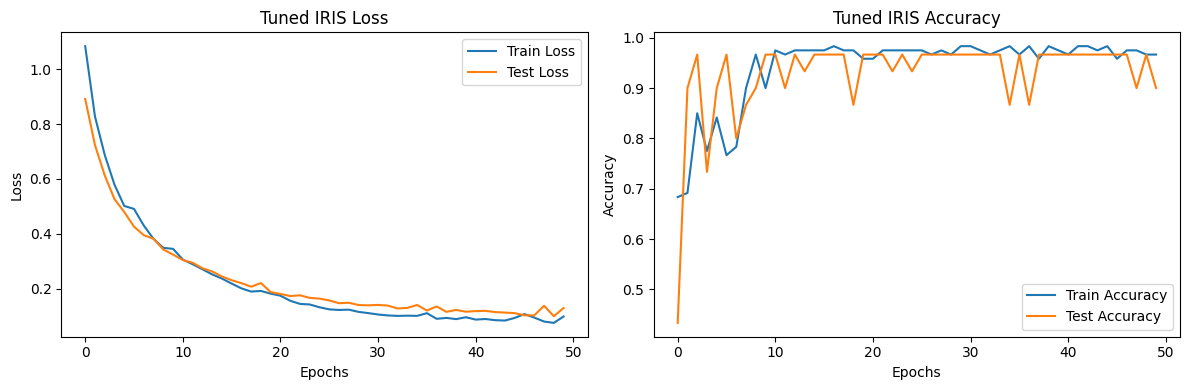

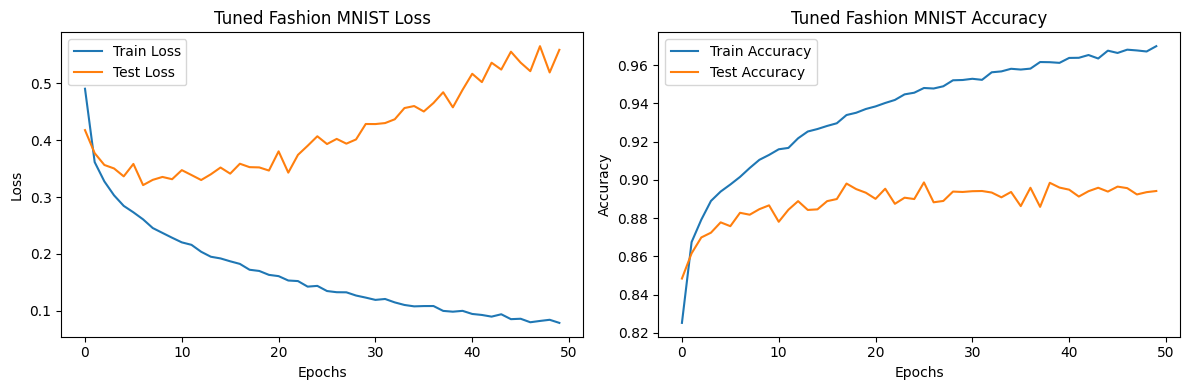

In [10]:
# Plotting for tuned IRIS dataset
plt.figure(figsize=(12, 4))

# Loss plot for tuned IRIS
plt.subplot(1, 2, 1)
plt.plot(history_iris_tuned.history['loss'], label='Train Loss')
plt.plot(history_iris_tuned.history['val_loss'], label='Test Loss')
plt.title('Tuned IRIS Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot for tuned IRIS
plt.subplot(1, 2, 2)
plt.plot(history_iris_tuned.history['accuracy'], label='Train Accuracy')
plt.plot(history_iris_tuned.history['val_accuracy'], label='Test Accuracy')
plt.title('Tuned IRIS Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting for tuned Fashion MNIST dataset
plt.figure(figsize=(12, 4))

# Loss plot for tuned Fashion MNIST
plt.subplot(1, 2, 1)
plt.plot(history_fashion_tuned.history['loss'], label='Train Loss')
plt.plot(history_fashion_tuned.history['val_loss'], label='Test Loss')
plt.title('Tuned Fashion MNIST Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot for tuned Fashion MNIST
plt.subplot(1, 2, 2)
plt.plot(history_fashion_tuned.history['accuracy'], label='Train Accuracy')
plt.plot(history_fashion_tuned.history['val_accuracy'], label='Test Accuracy')
plt.title('Tuned Fashion MNIST Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
# Define callbacks
checkpoint = ModelCheckpoint('model_best_weights.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1) # Change file extension to .keras
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model with callbacks for Fashion MNIST
history_fashion_with_callbacks = model_fashion.fit(
    X_train_fashion, y_train_fashion, epochs=50, batch_size=64, validation_data=(X_test_fashion, y_test_fashion),
    callbacks=[checkpoint, early_stop]
)


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9678 - loss: 0.0841
Epoch 1: val_loss improved from inf to 0.53618, saving model to model_best_weights.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9678 - loss: 0.0841 - val_accuracy: 0.8845 - val_loss: 0.5362
Epoch 2/50
936/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9676 - loss: 0.0850
Epoch 2: val_loss improved from 0.53618 to 0.52028, saving model to model_best_weights.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9676 - loss: 0.0850 - val_accuracy: 0.8865 - val_loss: 0.5203
Epoch 3/50
929/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9700 - loss: 0.0809
Epoch 3: val_loss improved from 0.52028 to 0.50970, saving model to model_best_weights.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9700 - loss: 0.0809 - val_accuracy: 0.8936 - val_loss: 0.5097
Epoch 4/50
931/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9691 - loss: 0.0830
Epoch 4: val_loss did not impr

In [12]:
# Save the entire model (architecture + weights)
model_fashion.save('fashion_mnist_model.h5')

# Load the model later
loaded_model = tf.keras.models.load_model('fashion_mnist_model.h5')

# Evaluate the loaded model
loss_loaded, accuracy_loaded = loaded_model.evaluate(X_test_fashion, y_test_fashion)
print(f"Loaded Model Accuracy: {accuracy_loaded * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8920 - loss: 0.5185
Loaded Model Accuracy: 89.36%


**TASK 3**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Step 1: Load California Housing Dataset
housing_data = fetch_california_housing(as_frame=True)
X = housing_data.data
y = housing_data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Build the model
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Create the model
model = build_model()

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=1)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.2852 - mae: 0.7963 - val_loss: 0.4496 - val_mae: 0.4699
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3880 - mae: 0.4474 - val_loss: 0.4028 - val_mae: 0.4511
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3629 - mae: 0.4276 - val_loss: 0.3958 - val_mae: 0.4491
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3592 - mae: 0.4268 - val_loss: 0.3777 - val_mae: 0.4337
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3289 - mae: 0.4073 - val_loss: 0.3608 - val_mae: 0.4235
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3340 - mae: 0.4052 - val_loss: 0.3542 - val_mae: 0.4110
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3214 - mae: 0.3985 - val_loss: 0.3470 - val_mae: 0.4163
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3193 - mae: 0.3950 - val_loss: 0.3421 - val_mae: 0.4146
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3273 

In [15]:
#print accuracy and loss
print("Training Loss:", history.history['loss'][-1])
print("Validation Loss:", history.history['val_loss'][-1])
print("training accuracy:", history.history['mae'][-1])
print("testing accuracy:", history.history['val_mae'][-1])

Training Loss: 0.2547139823436737
Validation Loss: 0.28954118490219116
training accuracy: 0.3423662483692169
testing accuracy: 0.3657037019729614


In [16]:
# Build a model with more layers and different units
model_tuned = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile with a different optimizer
model_tuned.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

# Train the tuned model
history_tuned = model_tuned.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1032/1032 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6103 - mae: 0.5447 - val_loss: 0.4005 - val_mae: 0.4559
Epoch 2/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3764 - mae: 0.4355 - val_loss: 0.3864 - val_mae: 0.4296
Epoch 3/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3544 - mae: 0.4198 - val_loss: 0.3876 - val_mae: 0.4266
Epoch 4/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3494 - mae: 0.4151 - val_loss: 0.4139 - val_mae: 0.4451
Epoch 5/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.3355 - mae: 0.4028 - val_loss: 0.3410 - val_mae: 0.4237
Epoch 6/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3335 - mae: 0.4028 - val_loss: 0.3146 - val_mae: 0.3882
Epoch 7/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3218 - mae: 0.3929 - val_loss: 0.3407 - val_mae: 0.4112
Epoch 8/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3164 - mae: 0.3893 - val_loss: 0.3358 - val_mae: 0.3939
Epoch 9/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/st

In [17]:
#print accuracy after hyperparameter tuning of both tes and training
print("training accuracy:", history_tuned.history['mae'][-1])
print("Training Loss:", history_tuned.history['loss'][-1])
print("Validation Loss:", history_tuned.history['val_loss'][-1])
print("Validation accuracy:", history_tuned.history['val_mae'][-1])

training accuracy: 0.3497459888458252
Training Loss: 0.25905707478523254
Validation Loss: 0.31039801239967346
Validation accuracy: 0.395258367061615


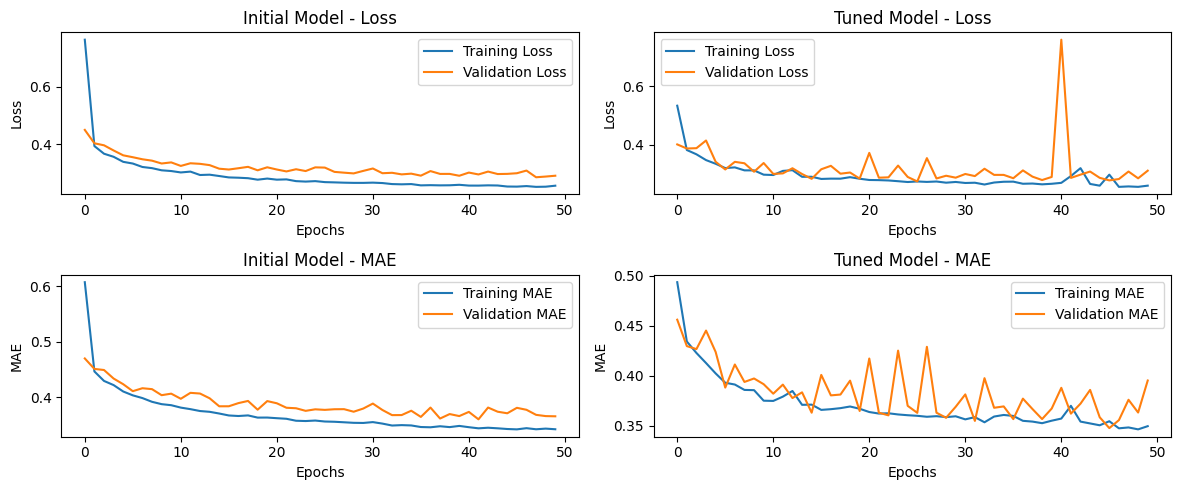

In [18]:
import matplotlib.pyplot as plt

def plot_histories(histories, titles):
    """
    Plots multiple histories in a single row for comparison.

    Args:
        histories (list): List of history objects from model training.
        titles (list): List of titles corresponding to each history.
    """
    num_models = len(histories)
    plt.figure(figsize=(6 * num_models, 5))

    for i, (history, title) in enumerate(zip(histories, titles)):
        # Plot loss
        plt.subplot(2, num_models, i + 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'{title} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # Plot MAE
        plt.subplot(2, num_models, i + 1 + num_models)
        plt.plot(history.history['mae'], label='Training MAE')
        plt.plot(history.history['val_mae'], label='Validation MAE')
        plt.title(f'{title} - MAE')
        plt.xlabel('Epochs')
        plt.ylabel('MAE')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Plot both histories in a single row
plot_histories([history, history_tuned], ['Initial Model', 'Tuned Model'])


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8749 - mae: 0.6373 - val_loss: 0.3758 - val_mae: 0.4352
Epoch 2/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3696 - mae: 0.4311 - val_loss: 0.3512 - val_mae: 0.4091
Epoch 3/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3398 - mae: 0.4106 - val_loss: 0.3236 - val_mae: 0.3931
Epoch 4/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4826 - mae: 0.4014 - val_loss: 0.3161 - val_mae: 0.4016
Epoch 5/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3294 - mae: 0.3856 - val_loss: 0.3171 - val_mae: 0.3742
Epoch 6/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3162 - mae: 0.3774 - val_loss: 0.2957 - val_mae: 0.3735
Epoch 7/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2946 - mae: 0.3734 - val_loss: 0.2994 - val_mae: 0.3741
Epoch 8/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2979 - mae: 0.3713 - val_loss: 0.2942 - val_mae: 0.3800
Epoch 9/50
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/st

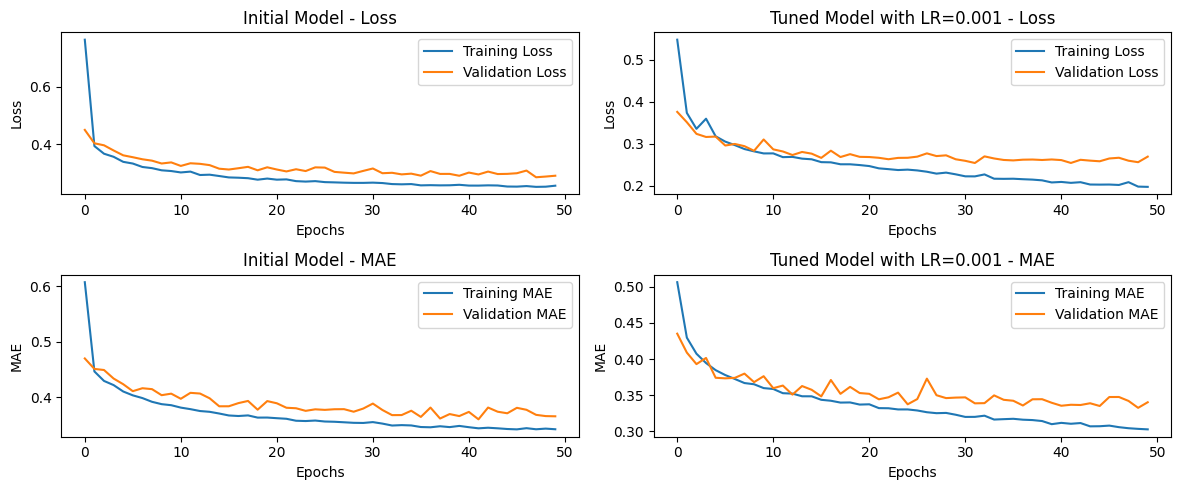

In [22]:
# Build a model with more layers and different units
model_tuned = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile with a different optimizer (learning rate = 0.001)
model_tuned.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the tuned model
history_tuned_lr = model_tuned.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16)

# Plot both histories in a single row
plot_histories([history, history_tuned_lr], ['Initial Model', 'Tuned Model with LR=0.001'])


In [23]:
#print accuracy and loss
print("Training Loss:", history_tuned_lr.history['loss'][-1])
print("Validation Loss:", history_tuned_lr.history['val_loss'][-1])
print("training accuracy:", history_tuned_lr.history['mae'][-1])
print("testing accuracy:", history_tuned_lr.history['val_mae'][-1])

Training Loss: 0.19724585115909576
Validation Loss: 0.26926568150520325
training accuracy: 0.3029268682003021
testing accuracy: 0.3404012620449066


In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the model checkpoint callback to save the best model weights
model_checkpoint_lr = ModelCheckpoint(
    filepath='best_model_lr.weights.h5',  # Saving weights only with .h5 extension
    save_best_only=True,  # Save only the best model (based on val_loss)
    monitor='val_loss',
    save_weights_only=True,  # Save weights only, not the entire model
    verbose=1
)

# Train the model with callbacks (for saving weights)
history_lr_with_checkpoint = model_lr.fit(
    X_train, y_train, validation_data=(X_test, y_test),
    epochs=50, batch_size=32, callbacks=[model_checkpoint_lr]
)


Epoch 1/50
483/516 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2410 - mae: 0.3356
Epoch 1: val_loss improved from inf to 0.27978, saving model to best_model_lr.weights.h5
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2412 - mae: 0.3357 - val_loss: 0.2798 - val_mae: 0.3646
Epoch 2/50
503/516 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2478 - mae: 0.3417
Epoch 2: val_loss improved from 0.27978 to 0.26935, saving model to best_model_lr.weights.h5
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2478 - mae: 0.3417 - val_loss: 0.2693 - val_mae: 0.3505
Epoch 3/50
493/516 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2382 - mae: 0.3350
Epoch 3: val_loss did not improve from 0.26935
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2385 - mae: 0.3351 - val_loss: 0.2779 - val_mae: 0.3528
Epoch 4/50
489/516 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2536 - mae: 0.3403
Epoch 4: val_loss did not improve from 0.26935
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2532 - mae: 0.3401 - val_los

In [25]:
# Save the entire model (including architecture, weights, and optimizer state)
model_lr.save('best_model_lr.keras')


In [26]:
from tensorflow.keras.models import load_model

# Load the model (entire model including architecture and weights)
loaded_model_lr = load_model('best_model_lr.keras')

# Evaluate the loaded model
loss, mae = loaded_model_lr.evaluate(X_test, y_test)
print(f'Loaded model MAE: {mae}')


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2604 - mae: 0.3453
Loaded model MAE: 0.34730613231658936
